In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('/kaggle/input/ad-click-data/Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [37]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [38]:
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Male'].fillna(df['Male'].median(), inplace=True)

df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)




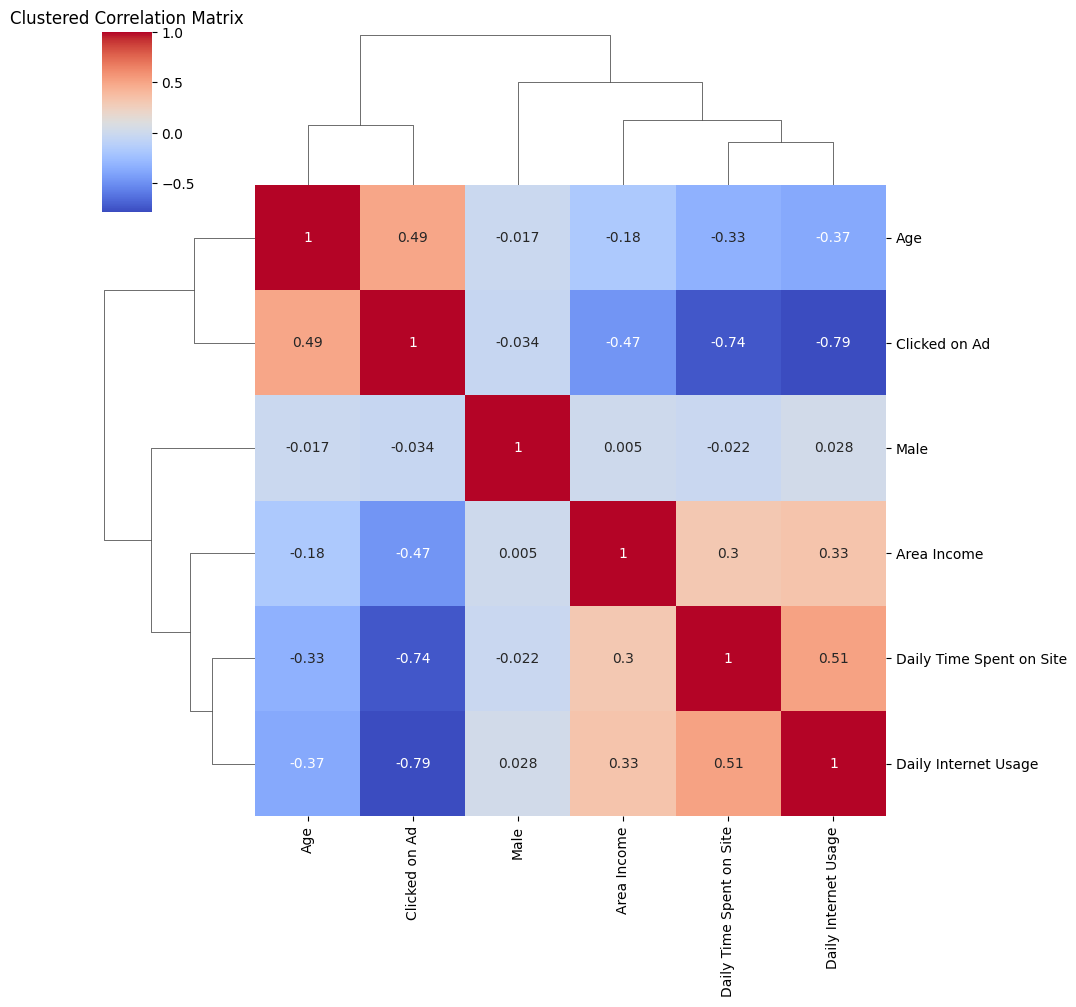

In [50]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', method='average', col_cluster=True, row_cluster=True)
plt.title("Clustered Correlation Matrix")
plt.show()

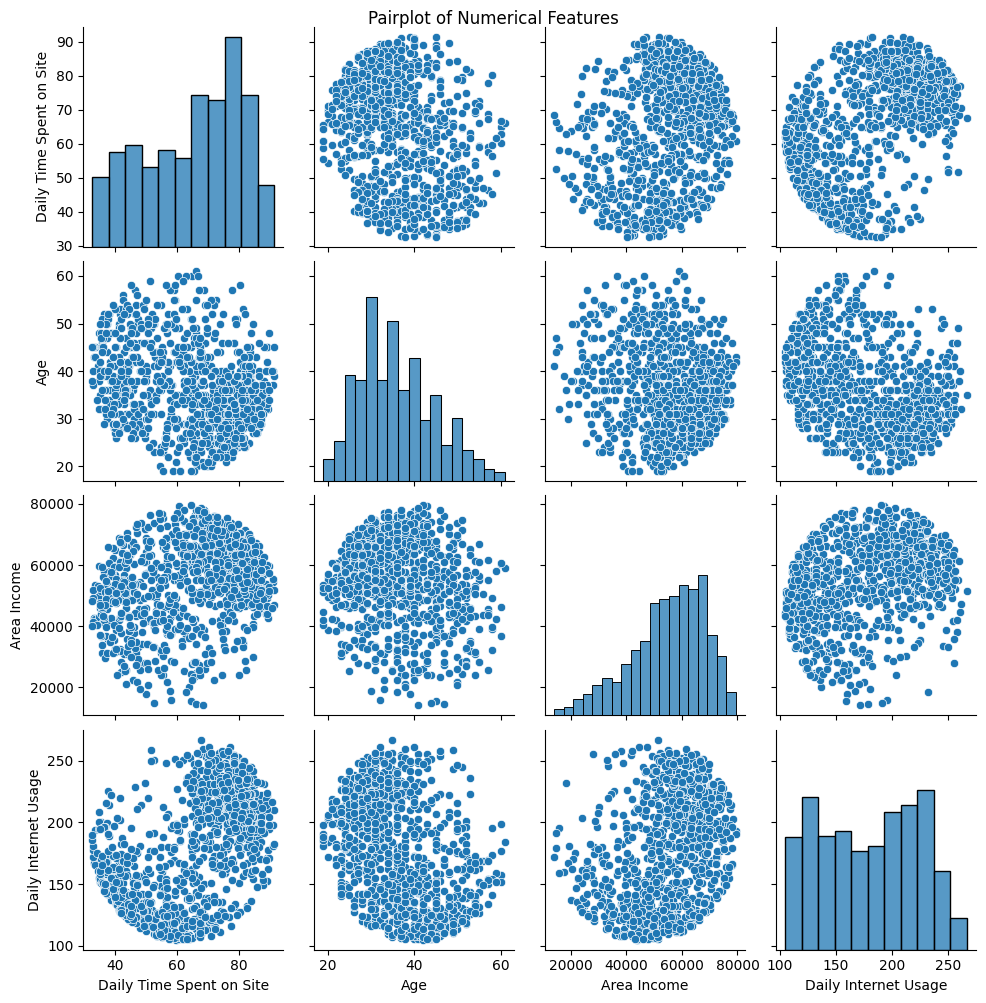

In [49]:
selected_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad']
df_selected = df[selected_columns]
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
sns.pairplot(df_selected[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1)
plt.show()

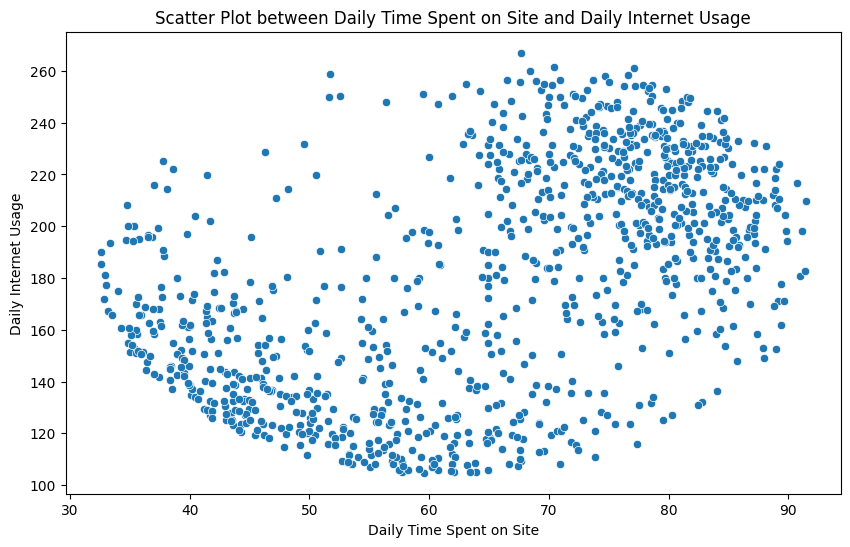

In [51]:
f1 = 'Daily Time Spent on Site'
f2 = 'Daily Internet Usage'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=f1, y=f2, data=df)
plt.title(f'Scatter Plot between {f1} and {f2}')
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].astype(str))

In [63]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91,960,0.0,215,406,0
1,80.23,31,68441.85,193.77,464,902,1.0,147,578,0
2,69.47,26,59785.94,236.50,566,111,0.0,184,328,0
3,74.15,29,54806.18,245.89,903,938,1.0,103,9,0
4,68.37,35,73889.99,225.58,766,804,0.0,96,869,0


In [64]:
features = [col for col in df.columns if col not in ['Timestamp', 'Clicked on Ad']]
X = df[features]
y = df['Clicked on Ad']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=36)


In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = lr.predict(X_test)

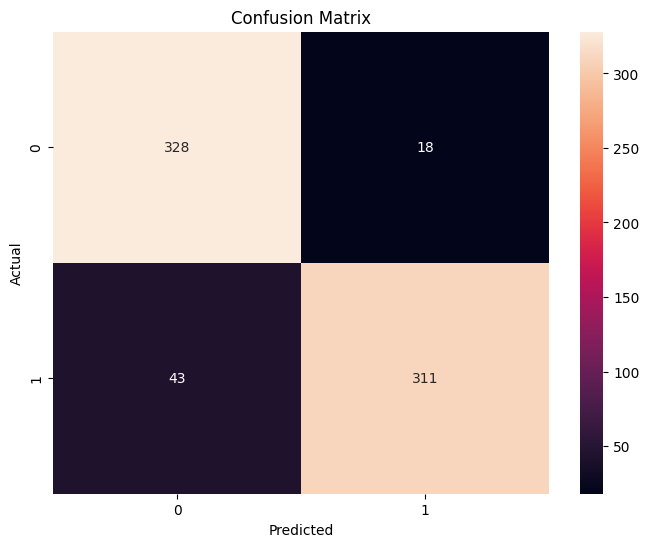

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       346
           1       0.95      0.88      0.91       354

    accuracy                           0.91       700
   macro avg       0.91      0.91      0.91       700
weighted avg       0.92      0.91      0.91       700

